# FullyConnected on FMNIST (Accuracy, Implicit Model Calibration)

### Imports and Setup

In [1]:
# PyTorch and Models
import torch
from architectures.FullyConnected import FullyConnected

# Helper functions
import datasets.datasets as datasets
from util.common import *

In [2]:
# Make PyTorch deterministic
torch.manual_seed(0)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Data, Training and Test Sets

In [3]:
# Loading dataset into training and test data
training_loader = datasets.fmnist_training_loader()
test_loader = datasets.fmnist_test_loader()

100%|██████████| 26421880/26421880 [00:04<00:00, 6081238.60it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 2173098.15it/s]

Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6084796.48it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 9761427.21it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



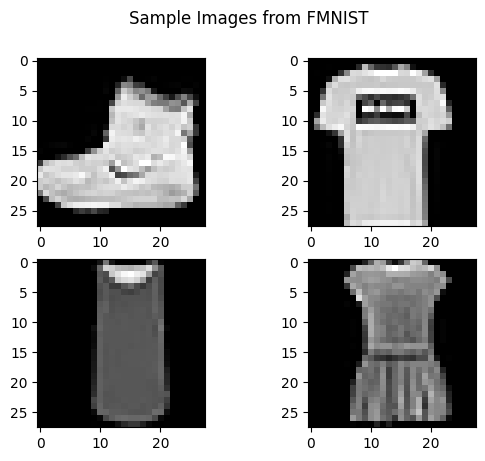

In [6]:
# Some sample images from the dataset
show_images (datasets.fmnist_training_dataset(), 4, 'Sample Images from FMNIST')

### Training with Different Label Smoothing Constants

In [ ]:
model = FullyConnected(1200, 0)
model.train_model(device, training_loader, test_loader, 0, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model.state_dict(), "models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Hard_Labels.pt")

In [ ]:
model = FullyConnected(1200, 0)
model.train_model(device, training_loader, test_loader, 0.05, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model.state_dict(), "models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_005.pt")

In [ ]:
model = FullyConnected(1200, 0)
model.train_model(device, training_loader, test_loader, 0.1, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model.state_dict(), "models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_01.pt")

In [ ]:
model = FullyConnected(1200, 0)
model.train_model(device, training_loader, test_loader, 0.15, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model.state_dict(), "models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_015.pt")

In [ ]:
model = FullyConnected(1200, 0)
model.train_model(device, training_loader, test_loader, 0.3, NUM_EPOCHS_FULLY_CONNECTED)

torch.save(model.state_dict(), "models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_03.pt")

### Accuracies for Models

In [4]:
# Temperature for temperature scaling
temperature = 1.1

model = FullyConnected(1200)
model.load_state_dict(torch.load(f"models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Hard_Labels.pt", map_location=device))
model.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Hard Labels: {100-compute_accuracy(model, test_loader, device).cpu().item():.2f}%")
rel_bins_Hard = bin_reliability(model, test_loader, device, NUM_BINS)
rel_bins_Temperature = bin_reliability(model, test_loader, device, NUM_BINS, temperature)

Error for network using Hard Labels: 8.99%


In [5]:
model = FullyConnected(1200)
model.load_state_dict(torch.load(f"models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_005.pt", map_location=device))
model.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.05): {100-compute_accuracy(model, test_loader, device).cpu().item():.2f}%")
rel_bins_Smooth = bin_reliability(model, test_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.05): 9.34%


In [6]:
model = FullyConnected(1200)
model.load_state_dict(torch.load(f"models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_01.pt", map_location=device))
model.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.1): {100-compute_accuracy(model, test_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_2 = bin_reliability(model, test_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.1): 9.55%


In [7]:
model = FullyConnected(1200)
model.load_state_dict(torch.load(f"models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_015.pt", map_location=device))
model.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.15): {100-compute_accuracy(model, test_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_3 = bin_reliability(model, test_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.15): 9.41%


In [8]:
model = FullyConnected(1200)
model.load_state_dict(torch.load(f"models/FC_FMNIST_Accuracy_IMC/FullyConnected_FMNIST_Smooth_Labels_03.pt", map_location=device))
model.to(device)

# Compute Accuracy and Reliability
print(f"Error for network using Label smoothing (alpha = 0.3): {100-compute_accuracy(model, test_loader, device).cpu().item():.2f}%")
rel_bins_Smooth_4 = bin_reliability(model, test_loader, device, NUM_BINS)

Error for network using Label smoothing (alpha = 0.3): 9.63%


#### Compute ECE Score

In [9]:
print(f"ECE w. Hard Labels: {calculate_ece(rel_bins_Hard):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.05): {calculate_ece(rel_bins_Smooth):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.1): {calculate_ece(rel_bins_Smooth_2):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.15): {calculate_ece(rel_bins_Smooth_3):.4f}")
print(f"ECE w. Smooth Labels (alpha = 0.3): {calculate_ece(rel_bins_Smooth_4):.4f}")
print(f"ECE w. Temperature Scaling: {calculate_ece(rel_bins_Temperature):.4f}")

ECE w. Hard Labels: 0.0097
ECE w. Smooth Labels (alpha = 0.05): 0.0423
ECE w. Smooth Labels (alpha = 0.1): 0.0846
ECE w. Smooth Labels (alpha = 0.15): 0.1282
ECE w. Smooth Labels (alpha = 0.3): 0.2516
ECE w. Temperature Scaling: 0.0075


#### Plot Reliability Diagram

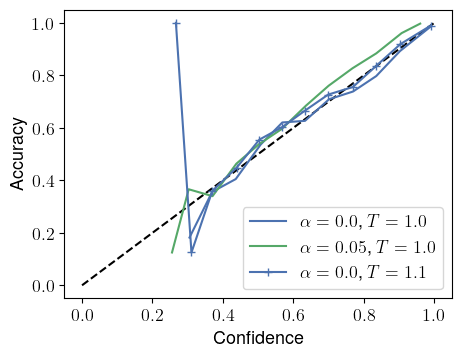

In [10]:
fig = plot_reliability(rel_bins_Hard, rel_bins_Smooth, rel_bins_Temperature, temperature, 0.05)
fig.savefig(format="pdf", fname="figures/reliability_fmnist.pdf",bbox_inches='tight')